In [1]:
import cellpy
import matplotlib.pyplot as plt
from cellpy.utils import plotutils
import numpy as np
import pandas as pd
import glob

import os
os.listdir('.')

['.ipynb_checkpoints',
 '20210430_seam10_01_01_cc_01_Channel_48_Wb_1_csv.csv',
 '20210430_seam10_01_01_cc_02_Channel_48_Wb_1_csv.csv',
 '20210430_seam10_01_02_cc_01_Channel_49_Wb_1_csv.csv',
 '20210430_seam10_01_02_cc_02_Channel_49_Wb_1_csv.csv',
 '20210430_seam10_01_03_cc_01_Channel_50_Wb_1_csv.csv',
 '20210430_seam10_01_03_cc_02_Channel_50_Wb_1_csv.csv',
 '20210430_seam10_02_01_cc_01_Channel_52_Wb_1_csv.csv',
 '20210430_seam10_02_01_cc_02_Channel_52_Wb_1_csv.csv',
 '20210430_seam10_02_02_cc_01_Channel_53_Wb_1_csv.csv',
 '20210430_seam10_02_02_cc_02_Channel_53_Wb_1_csv.csv',
 '20210430_seam10_02_03_cc_01_Channel_54_Wb_1_csv.csv',
 '20210430_seam10_02_03_cc_02_Channel_54_Wb_1_csv.csv',
 '20210430_seam10_03_01_cc_01_Channel_55_Wb_1_csv.csv',
 '20210430_seam10_03_01_cc_02_Channel_55_Wb_1_csv.csv',
 '20210430_seam10_03_02_cc_01_Channel_56_Wb_1_csv.csv',
 '20210430_seam10_03_02_cc_02_Channel_56_Wb_1_csv.csv',
 '20210430_seam10_03_03_cc_01_Channel_57_Wb_1_csv.csv',
 '20210430_seam10_03_03_c

In [30]:
# Read filenames from the given path
cell_1 = [f for f in os.listdir(r"C:\scripts_marte") if 'seam10_01_02' in f]
cell_2 = [f for f in os.listdir(r"C:\scripts_marte") if 'seam10_02_02' in f]
cell_3 = [f for f in os.listdir(r"C:\scripts_marte") if 'seam10_03_02' in f]
cell_4 = [f for f in os.listdir(r"C:\scripts_marte") if 'seam10_04_02' in f]

def load_files(filenames):
    for filename in filenames:
        yield (pd.read_csv(filename, usecols=['Cycle_Index', 'Charge_Capacity(Ah)', 'Discharge_Capacity(Ah)'], delimiter=';', encoding='UTF-8'))
        

cell_1_cap = pd.concat(load_files(cell_1))
cell_2_cap = pd.concat(load_files(cell_2))
cell_3_cap = pd.concat(load_files(cell_3))
cell_4_cap = pd.concat(load_files(cell_4))

cell_1_cap["seam10_01_02"] = cell_1_cap["Discharge_Capacity(Ah)"]*1000/6.077722222222222e-05
cell_2_cap["seam10_02_02"] = cell_2_cap["Discharge_Capacity(Ah)"]*1000/1.769252777777778e-05
cell_3_cap["seam10_03_02"] = cell_3_cap["Discharge_Capacity(Ah)"]*1000/1.3694819444444445e-05
cell_4_cap["seam10_04_02"] = cell_4_cap["Discharge_Capacity(Ah)"]*1000/1.008027777777778e-05

#remove values that are <10
cell_1_cap = cell_1_cap[~(cell_1_cap['Discharge_Capacity(Ah)'] <= 0.00001)]
cell_2_cap = cell_2_cap[~(cell_2_cap['Discharge_Capacity(Ah)'] <= 0.00001)]
cell_3_cap = cell_3_cap[~(cell_3_cap['Discharge_Capacity(Ah)'] <= 0.00001)]
cell_4_cap = cell_4_cap[~(cell_4_cap['Discharge_Capacity(Ah)'] <= 0.00001)]
#make new indexes
cell_1_cap.reset_index(drop=True, inplace=True)
cell_2_cap.reset_index(drop=True, inplace=True)
cell_3_cap.reset_index(drop=True, inplace=True)
cell_4_cap.reset_index(drop=True, inplace=True)
#make the index start at 1 (cycle number)
cell_1_cap.index += 1
cell_2_cap.index += 1
cell_3_cap.index += 1
cell_4_cap.index += 1

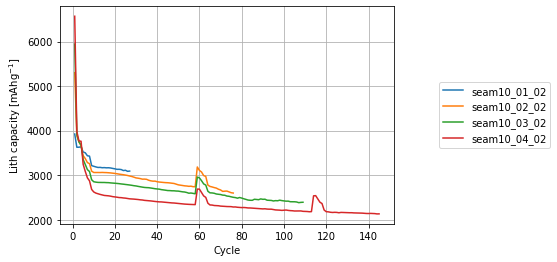

In [45]:
ax = plt.gca()
cell_1_cap.iloc[0:150].plot(y="seam10_01_02", ax=ax)
cell_2_cap.iloc[0:150].plot(y="seam10_02_02", ax=ax)
cell_3_cap.iloc[0:150].plot(y="seam10_03_02", ax=ax)
cell_4_cap.iloc[0:150].plot(y="seam10_04_02", ax=ax)


plt.xlabel('Cycle',fontsize=10)
plt.ylabel('Lith capacity [mAhg$^{-1}$]',fontsize=10)
plt.yticks(fontsize=10)
plt.xlim=(0.8,3.2)
plt.grid()
ax.legend(loc='center', bbox_to_anchor=(1.3, 0.5))


plt.savefig(f'plots\Lithiation capacity - seam10.png', bbox_inches='tight', dpi=500)

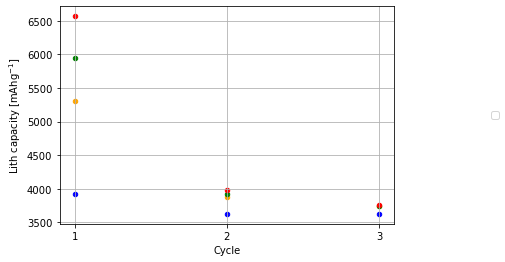

In [47]:
ax = plt.gca()
cell_1_cap.iloc[0:3].plot.scatter(x="Cycle_Index", y="seam10_01_02", ax=ax, xticks=(1,2,3), c='Blue')
cell_2_cap.iloc[0:3].plot.scatter(x="Cycle_Index", y="seam10_02_02", ax=ax, c='Orange')
cell_3_cap.iloc[0:3].plot.scatter(x="Cycle_Index", y="seam10_03_02", ax=ax, c='Green')
cell_4_cap.iloc[0:3].plot.scatter(x="Cycle_Index", y="seam10_04_02", ax=ax, c='Red')


plt.xlabel('Cycle',fontsize=10)
plt.ylabel('Lith capacity [mAhg$^{-1}$]',fontsize=10)
plt.yticks(fontsize=10)
plt.xlim=(0.8,3.2)
plt.grid()
ax.legend(loc='center', bbox_to_anchor=(1.3, 0.5))


plt.savefig(f'plots\Lithiation capacity - seam10_first 3.png', bbox_inches='tight', dpi=500)

## Calculating mass from cycling data

In [27]:
cell_4_cap = cell_4_cap["Charge_Capacity(Ah)"]
mass = []

gram = ((cell_4_cap[3]+cell_4_cap[2])/2)/3.6
mass.append(gram)
    
mass

[1.008027777777778e-05]

## Coulombic efficiency

In [62]:
cell_1_cap["Charge_Capacity(mAh/g)"] = cell_1_cap["Charge_Capacity(Ah)"]*1000/6.077722222222222e-05
cell_1_cap["Discharge_Capacity(mAh/g)"] = cell_1_cap["Discharge_Capacity(Ah)"]*1000/6.077722222222222e-05
#cell_2_cap["Charge_capacity(mAh/g)"] = cell_2_cap["Charge_Capacity(Ah)"]*1000/1.769252777777778e-05
#cell_3_cap["Charge_capacity(mAh/g)"] = cell_3_cap["Charge_Capacity(Ah)"]*1000/1.3694819444444445e-05
#cell_4_cap["Charge_capacity(mAh/g)"] = cell_4_cap["Charge_Capacity(Ah)"]*1000/1.008027777777778e-05

#cell_2_cap["seam10_02_02"] = cell_2_cap["Discharge_Capacity(Ah)"]*1000/1.769252777777778e-05
#cell_3_cap["seam10_03_02"] = cell_3_cap["Discharge_Capacity(Ah)"]*1000/1.3694819444444445e-05
#cell_4_cap["seam10_04_02"] = cell_4_cap["Discharge_Capacity(Ah)"]*1000/1.008027777777778e-05

cap_chg = cell_1_cap['Charge_Capacity(mAh/g)'][0:75]
cap_dchg = cell_1_cap['Discharge_Capacity(mAh/g)'][0:75]

cell_1_cap

cap_l = [] # This is the list we are going to put the numbers in

for i in range(1:3):
    CE = cap_chg[i+2]/cap_dchg[i+1]*100       # Here we calculate 1 value for R in a for loop
    cap_l.append(CE)       # Here we add the R to the list 
    
cell_1_cap["Coulombic_Efficiency(%)"]=cap_l
cell_1_cap

SyntaxError: invalid syntax (<ipython-input-62-af4c496a479a>, line 18)